Ans 0.

If I were to start working with this data on a business context, I would like to also have some metadata/summary about the definition of each column inside each table ( information about what type of data a particular column holds.

Also, information about keys. The ERD is good but is missing information on which columns are the primary keys, foregin ketys etc. 

---

Ans 1.1 

From the ERD, it is clear that the relationship between users and devices is many to many. This is not possible in 
the real world. (A single user can have multiple devices but a single device can't be owned (technically) by multiple users at the same time.)



---

Ans 1.2
Logic: Each user has multiple devices and the device to user information is stored on the user_device table. First merge the attribution table with user_device table on device_id and then sort the resulting table on dates (present int he attribution table itself) and remove duplicates on user_id column.

The result will be a dataframe with information on user_id, device_id, date, campaign id. (Also tells us on which device each user first tried on/ got informed about earnin!)

In [26]:
#Read the attribution file
attribution <- read.csv("/Users/raviswanath/Desktop/R notebooks - udemy/AssessmentData/attribution.csv")
print(head(attribution))

      created_on campaign device_id
1  12/27/16 8:51   ZDNTT7      3063
2  12/28/16 8:42   15R3D0      1711
3  2/16/16 13:32   Y59GNL      2604
4 12/25/16 18:26   T8RNOQ      3559
5  12/17/15 3:28   OGMRY2      3915
6  10/9/16 20:38   6JI9BO      4459


In [27]:
#Getting information about the structure of the file
print(str(attribution))
attribution$created_on <- strptime(attribution$created_on, format = "%m/%d/%y %H:%M")

'data.frame':	5721 obs. of  3 variables:
 $ created_on: Factor w/ 5703 levels "1/1/14 1:09",..: 2269 2287 2654 2207 2009 1228 3094 5545 2454 253 ...
 $ campaign  : Factor w/ 100 levels "0837KH","0IBF68",..: 98 3 93 76 61 18 77 94 97 91 ...
 $ device_id : int  3063 1711 2604 3559 3915 4459 1118 909 3351 2509 ...
NULL


In [28]:
#Reading all other files as dataframes
user <- read.csv("/Users/raviswanath/Desktop/R notebooks - udemy/AssessmentData/user.csv")
sale <- read.csv("/Users/raviswanath/Desktop/R notebooks - udemy/AssessmentData/sale.csv")
user.device.data <- read.csv("/Users/raviswanath/Desktop/R notebooks - udemy/AssessmentData/user_device.csv")
device.data <- read.csv("/Users/raviswanath/Desktop/R notebooks - udemy/AssessmentData/device.csv")
item <- read.csv("/Users/raviswanath/Desktop/R notebooks - udemy/AssessmentData/item.csv")

In [29]:
# 1. Merging and storing attribution and user_device tables.
sorted.attribution <- merge(attribution, user.device.data, key='device_id')

#2. Sorting the sorted.attribution dataframe on dates of campaigns
sorted.attribution <- sorted.attribution[order(sorted.attribution$created_on), ]

#3. Removing duplicates on the column user_id to get each distinct user information
sorted.attribution[!duplicated(sorted.attribution$device_id),][c('campaign', 'user_id', 'created_on')]

,campaign,user_id,created_on
3670,IWTQ5T,2936,2013-10-01 03:10:00
3528,QY02HA,2817,2013-10-01 07:46:00
3997,1TNQYO,3202,2013-10-01 12:44:00
4109,VOR12L,3294,2013-10-01 17:15:00
3741,TJ5GIL,2997,2013-10-02 02:11:00
2433,OXIJAT,1931,2013-10-02 10:46:00
47,WELZTZ,43,2013-10-03 10:47:00
2486,HEXXCK,1963,2013-10-03 22:39:00
4220,YUHQJ6,3384,2013-10-04 03:06:00
441,7377FX,335,2013-10-04 16:14:00


In [30]:
#testing to see if any NA are present aftre making the join. 
m <- sorted.attribution[!duplicated(sorted.attribution$user_id),][c('campaign', 'user_id', 'created_on')]
sum(is.na(m))

[1] 0

---

Ans 1.3 

Taking a more careful approach here, merge attribution and device tables and store as 'a'. Merge sale and user_device tables and save as 'b'. (Drop dupicate device ID's after both merges). Finally, merge a and b to have information on each sale and associated campaign.  

In [7]:
#merging sale and user_device table and dropping duplicate device_id s after sorting with respect to time (created_on)
b<- merge(sale, user.device.data)
b <- b[order(b$created_on), ]
b <- b[!duplicated(b$device_id), ]
head(b)

,user_id,amount,created_on,id,date,weekday,device_id
15379,3219,2361.6184,2013-11-05 14:33:57,0,2013-11-05,1,4573
916,144,215.8672,2013-11-18 12:23:39,1,2013-11-18,0,193
13981,2884,502.8722,2013-11-20 23:40:01,2,2013-11-20,2,4075
10798,2155,2316.9663,2013-11-22 15:37:31,3,2013-11-22,4,3053
13640,2817,659.8763,2013-12-03 03:56:22,5,2013-12-03,1,3996
13799,2850,263.4959,2013-12-12 08:01:48,7,2013-12-12,3,4036


In [8]:
#Merging device-data and user-device data
a <- merge(device.data, user.device.data, key = 'device_id')

#Merging attribution and 'a' and then sorting by created-on and removing duplicate device_id s. 
c <- merge(attribution, a, by = 'device_id')
c <- c[order(c$created_on.x), ]
c <- c[!duplicated(c$device_id), ]

In [25]:
#answer (removing duplicates yet again in the column 'id')
ans <- merge(c, b, by = 'device_id')
ans <- ans[!duplicated(ans$id.y), ]
ans[c('device_id', 'campaign','user_id.x', 'id.y')]

,device_id,campaign,user_id.x,id.y
1,3,9VTGJV,2,14001
3,6,XGB35V,3,7730
4,7,TI1ZOJ,4,819
5,9,1ZDQF0,6,716
6,11,EH7LXL,9,6739
7,13,RK2JMQ,10,9722
9,16,AEJF2Y,11,8212
10,20,98WM2K,14,1744
11,23,705605,16,5391
12,24,GCP82I,17,10142


Ans 1.4

Definitely. Ignoring the fact that duplicates exist in the case of device_ids, a better structure around campagin information and sales information is possible by adding user_id information into the attribution table. 

That ways, it becomes a direct (assuming user_id to be the primary key in sale table and as a foreign key in attribution table) join to get campaign related sales information. 

---

Ans 2.1 

I would optimize for the probabilty of sale and revenue. Elaborating, say a particular product A turns out to be the most famous and generates x dollars each time sold. Another product B, less famous than A generates y dollars (y>x) everytime sold. Say the user (current) uses a product C. I would first figure out the probabilty of sale of A, B given sale of C, calculate the porbabilistic revenue and then show the ones which has a greatest probabilistic revenue. (Assuming the difference between x and y is not too great, say in 100s or 1000s).

The data I would want is about the sale of each unique product, information on the users who bought that product, sell price of each product. 

---

3. 

In [32]:
head(sale)

amount,created_on,user_id,id,date,weekday
2361.6184,2013-11-05 14:33:57,3219,0,2013-11-05,1
215.8672,2013-11-18 12:23:39,144,1,2013-11-18,0
502.8722,2013-11-20 23:40:01,2884,2,2013-11-20,2
2316.9663,2013-11-22 15:37:31,2155,3,2013-11-22,4
1243.2625,2013-11-24 12:33:27,2155,4,2013-11-24,6
659.8763,2013-12-03 03:56:22,2817,5,2013-12-03,1


In [33]:
#For this bit of analysis, we just need the date and amount columns.
new_sale <- subset(sale, select = c('amount', 'date'))
head(new_sale)

amount,date
2361.6184,2013-11-05
215.8672,2013-11-18
502.8722,2013-11-20
2316.9663,2013-11-22
1243.2625,2013-11-24
659.8763,2013-12-03


In [34]:
str(new_sale)

'data.frame':	14043 obs. of  2 variables:
 $ amount: num  2362 216 503 2317 1243 ...
 $ date  : Factor w/ 1037 levels "2013-11-05","2013-11-18",..: 1 2 3 4 5 6 7 8 9 9 ...


In [35]:
new_sale$date <- as.Date(new_sale$date)
str(new_sale)

'data.frame':	14043 obs. of  2 variables:
 $ amount: num  2362 216 503 2317 1243 ...
 $ date  : Date, format: "2013-11-05" "2013-11-18" ...


In [36]:
#Let's split the dataset into post 2017 and pre 2017.
pre2017 = subset(new_sale, date <= as.Date('2016-12-31'))
post2017 = subset(new_sale, date >= as.Date('2017-01-01'))

In [38]:
tail(post2017)

,amount,date
14038,16.37789,2017-02-26
14039,254.94744,2017-02-26
14040,250.51492,2017-02-26
14041,19.91319,2017-02-26
14042,15.61221,2017-02-26
14043,237.32685,2017-02-26


In [39]:
tail(pre2017)

,amount,date
11714,146.3184,2016-12-31
11715,673.9525,2016-12-31
11716,142.2432,2016-12-31
11717,344.3899,2016-12-31
11718,127.1337,2016-12-31
11719,265.3051,2016-12-31


In [41]:
#Aggregating post2017 to daily revenues and plotting
daily2017 <- aggregate(post2017$amount, by=list(Date = post2017$date), FUN=sum)
colnames(daily2017) = c('Date', 'revenue')
head(daily2017)

Date,revenue
2017-01-01,21259.06
2017-01-02,25157.90
2017-01-03,30428.15
2017-01-04,24375.32
2017-01-05,23098.29
2017-01-06,53795.83


In [42]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



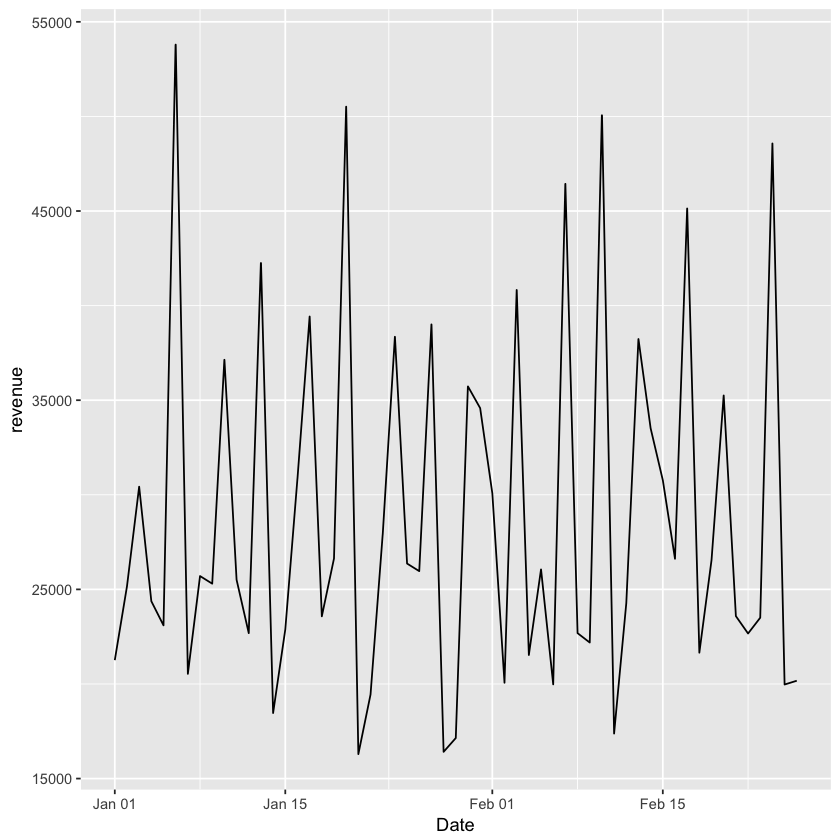

In [59]:
ggplot(daily2017, aes(Date, revenue)) + geom_line()

In [49]:
#Let's compare this with Nov-Dec 2016 and also with Jan-Feb 2016 (to see if this is due to seasonal effects)
NovDec2016 <- subset(pre2017, date <= as.Date("2016-12-31") & date >= as.Date("2016-11-01"))

In [50]:
#Aggregating to daily revenues and plotting
daily_late2016 <- aggregate(NovDec2016$amount, by=list(Date = NovDec2016$date), FUN=sum)
colnames(daily_late2016) = c('Date', 'revenue')
head(daily_late2016)

Date,revenue
2016-11-01,32479.37
2016-11-02,19594.26
2016-11-03,20819.52
2016-11-04,28699.23
2016-11-05,16323.82
2016-11-06,13221.06


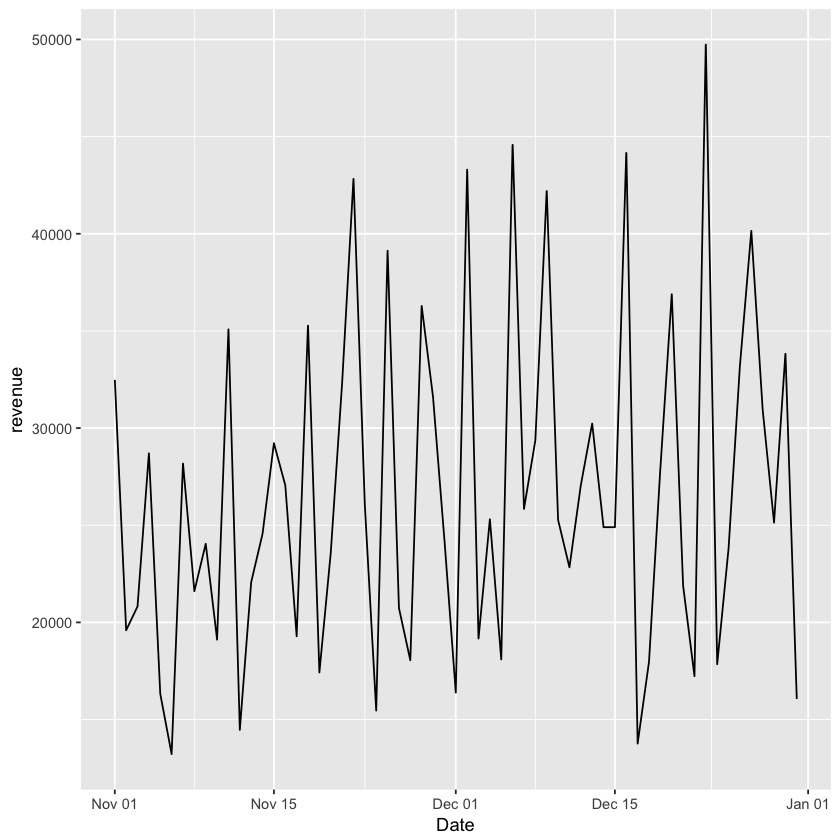

In [58]:
ggplot(daily_late2016, aes(Date, revenue)) + geom_line()

Let's see the range of revenues in 2017 (daily accumulation)

In [61]:
range(daily2017$revenue)

[1] 16292.71 53795.83

Range if revenue in Nov-Dec 2016

In [62]:
range(daily_late2016$revenue)

[1] 13221.06 49734.30

Nice. It's pretty clear that the minimum revenue during 2017 has been more than 2016. Less reasons to worry about. Let's also calculate the mean revenue of 2017 till now and the mean revenue during Noc-Dec 2016

In [65]:
#2017 Avg. Revenue
mean(daily2017$revenue)

[1] 28850.93

In [66]:
#Nov-Dec 2016 Avg. Revenue
mean(daily_late2016$revenue)

[1] 26699.58

Clearly, the average revnue of 2017 (Jan-Feb) is more (57 days) as compared to entire of Nov-Dec (61 days). More evidence towrads remaining chilled out. In fact, things have been better in 2017 as compared to late 2016. Let's also check how the same time (Jan-Feb 2016 was to get a clearer picture

In [67]:
Early2016 <- subset(pre2017, date >= as.Date("2016-01-01") & date <= as.Date("2016-02-28"))

In [69]:
#Daily revenue
daily_early2016 <- aggregate(Early2016$amount, by=list(Date = Early2016$date), FUN=sum)
colnames(daily_early2016) = c('Date', 'revenue')
head(daily_early2016)

Date,revenue
2016-01-01,17998.133
2016-01-02,5808.440
2016-01-03,6779.118
2016-01-04,7417.337
2016-01-05,15007.137
2016-01-06,6242.733


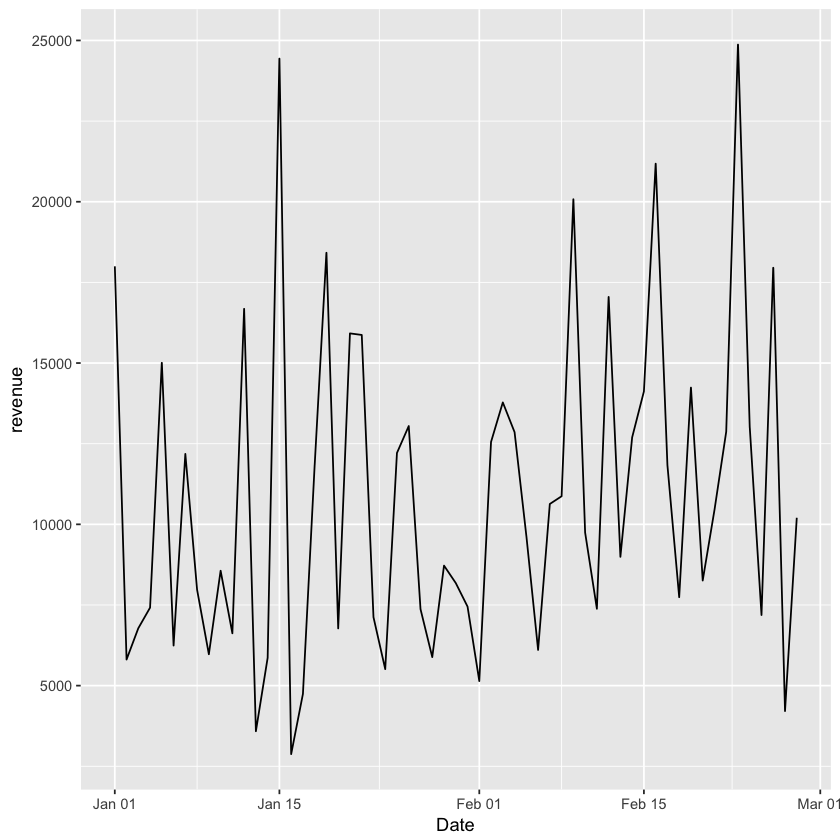

In [70]:
ggplot(daily_early2016, aes(Date, revenue)) + geom_line()

No need to look at the numbers! Things are way better in this same stage at 2017. Hence, no need to be worried! 

---